## Importing packages

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from functools import reduce
import matplotlib.pyplot as plt
import altair as alt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import smote as SMOTE

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

ModuleNotFoundError: No module named 'smote'

In [3]:
#Importing the dataset and starting EDA
manager_survey = pd.read_csv('manager_survey_data.csv',  sep = ',')
general_data = pd.read_csv('general_data.csv',  sep = ',')
employee_data = pd.read_csv('employee_survey_data.csv',  sep = ',')

In [4]:
manager_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [5]:
#Merging and cleaning data
emp_man = pd.merge(manager_survey, employee_data, on='EmployeeID')
data_hr = pd.merge(emp_man, general_data, on='EmployeeID')

data_hr.head()
data_hr.dropna(inplace=True)
data_hr.isnull().sum()
data_hr.drop(['Over18', 'EmployeeCount', 'StandardHours'], inplace=True, axis=1)

### Changing Datatypes

In [6]:

data_hr = data_hr.astype({'EnvironmentSatisfaction':'int64','JobSatisfaction':'int64','WorkLifeBalance':'int64','NumCompaniesWorked':'int64'})
data_hr['Attrition'] = data_hr['Attrition'].replace(['Yes'],True)
data_hr['Attrition'] = data_hr['Attrition'].replace(['No'],False)

In [14]:
data_hr['Department'].value_count()

AttributeError: 'Series' object has no attribute 'value_count'

## General EDA

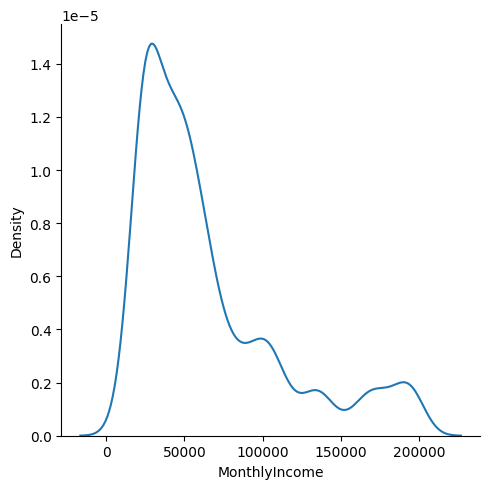

In [71]:
sns.displot(data=data_hr, 
            x="MonthlyIncome",
            kind="kde")

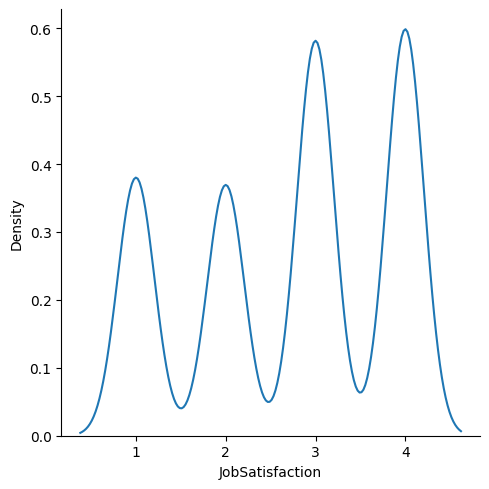

In [72]:
sns.displot(data=data_hr, 
            x="JobSatisfaction",
            kind="kde")

Department
Human Resources           58114.784946
Research & Development    67272.810830
Sales                     61295.485845
Name: MonthlyIncome, dtype: float64

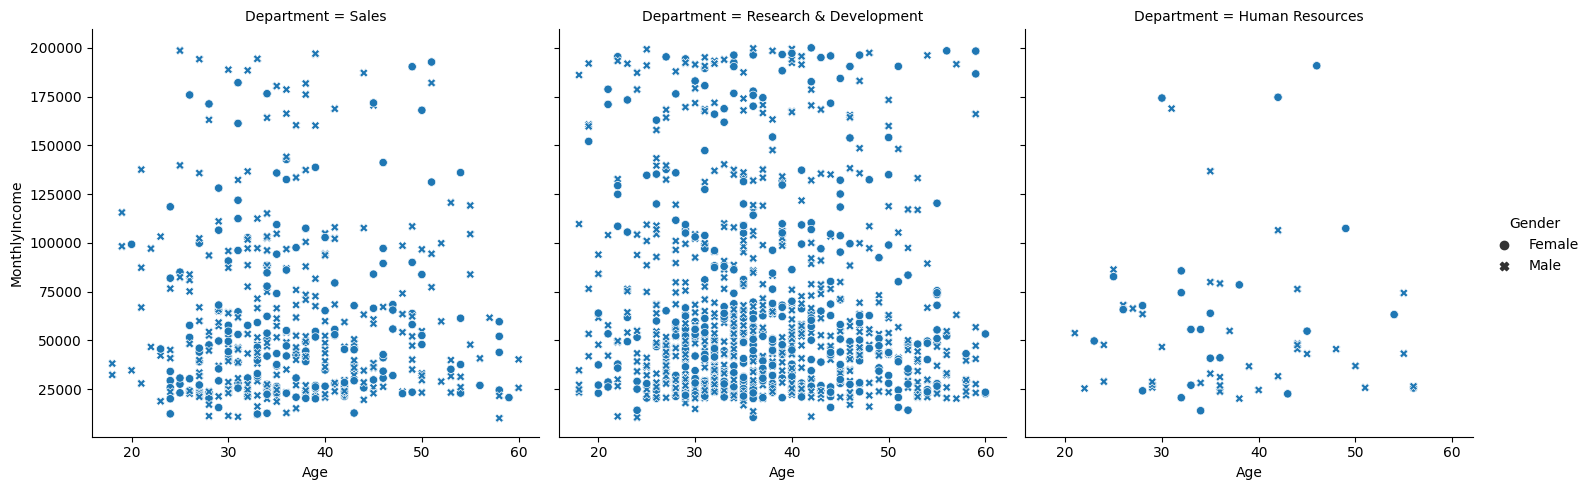

In [73]:
sns.relplot(data=data_hr, 
            x="Age", 
            y="MonthlyIncome",
            kind="scatter",
            col='Department',
            style= 'Gender')

data_hr.groupby('Department').MonthlyIncome.mean()

In [74]:
data_hr.groupby('Attrition').Age.mean()

Attrition
False    37.551734
True     33.686331
Name: Age, dtype: float64

In [75]:
data_hr.groupby('Attrition').JobSatisfaction.mean()

Attrition
False    2.774757
True     2.466187
Name: JobSatisfaction, dtype: float64

In [76]:
data_hr.groupby('Department').JobSatisfaction.mean()

Department
Human Resources           2.693548
Research & Development    2.703598
Sales                     2.775057
Name: JobSatisfaction, dtype: float64

In [77]:
data_hr.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3,4,2,51,False,Travel_Rarely,Sales,...,Married,131160,1,11,0,1.0,6,1,0,0
1,2,2,4,3,2,4,31,True,Travel_Frequently,Research & Development,...,Single,41890,0,23,1,6.0,3,5,1,4
2,3,3,3,2,2,1,32,False,Travel_Frequently,Research & Development,...,Married,193280,1,15,3,5.0,2,5,0,3
3,4,2,3,4,4,3,38,False,Non-Travel,Research & Development,...,Married,83210,3,11,3,13.0,5,8,7,5
4,5,3,3,4,1,3,32,False,Travel_Rarely,Research & Development,...,Single,23420,4,12,2,9.0,2,6,0,4


In [78]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   int64  
 4   JobSatisfaction          4300 non-null   int64  
 5   WorkLifeBalance          4300 non-null   int64  
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   bool   
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  Gender                   4300 non-null   object 
 14  JobLevel                

## Plots of current employees 

In [79]:
AttritionFalse = data_hr[data_hr.Attrition == False]

In [80]:
AttritionFalse.value_counts().sum()

3605

### Age 

In [81]:
#New column for age groups
data_hr['AgeGroups'] = pd.cut(data_hr['Age'], bins=[18, 25, 30, 40, 50, 60, 70, np.inf], include_lowest=True)

In [82]:
data_hr['Age'].nlargest(1)

153    60
Name: Age, dtype: int64

In [83]:
data_hr['Age'].nsmallest(1)

38    18
Name: Age, dtype: int64

<AxesSubplot: title={'center': 'Age Groups'}, xlabel='Age group', ylabel='% of employees'>

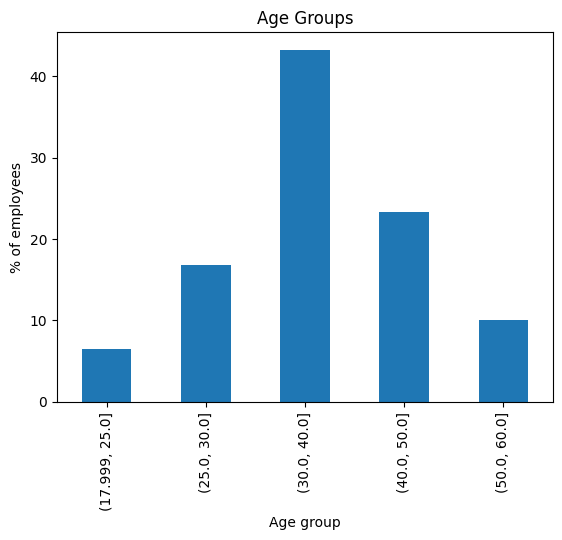

In [84]:
#Bar chart for age groups Current Employees
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.AgeGroups, AttritionFalse.AgeGroups.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Age Groups', ylabel='% of employees', xlabel='Age group', legend=False)

### Gender 

<AxesSubplot: title={'center': 'Gender Diversity'}>

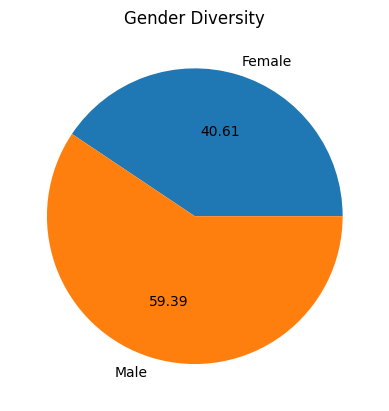

In [85]:
#Pie chart for Gender Diversity Current Employees
AttritionFalse = data_hr[data_hr.Attrition == False]
AttritionFalse.groupby('Gender').size().plot(kind='pie', autopct='%.2f', title='Gender Diversity')

### Education field 

<AxesSubplot: title={'center': 'Education Field'}, xlabel='Education field', ylabel='% of employees'>

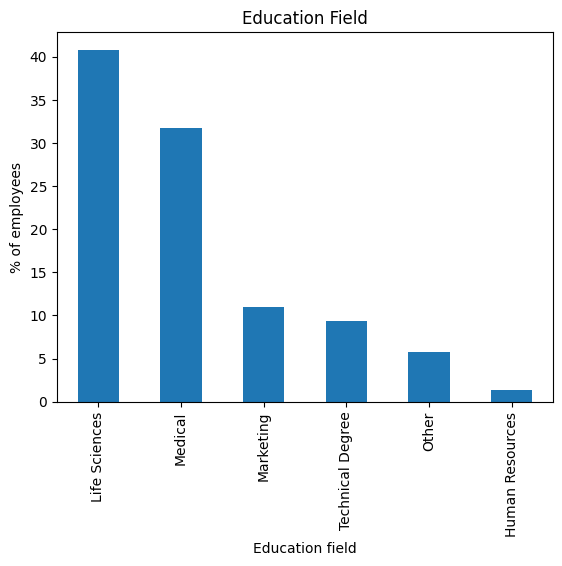

In [86]:
#Bar chart for Education Field
(pd.crosstab(AttritionFalse.EducationField, AttritionFalse.EducationField.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).sort_values(AttritionFalse.EducationField.count(), ascending=False).plot(kind='bar', title='Education Field', ylabel='% of employees', xlabel='Education field', legend=False)

### Income

In [87]:
# Income Groups
data_hr['IncomeGroups'] = pd.cut(data_hr['MonthlyIncome'], bins=[10000, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, np.inf])

<AxesSubplot: title={'center': 'Income Groups'}, xlabel='Income Group', ylabel='% of employees'>

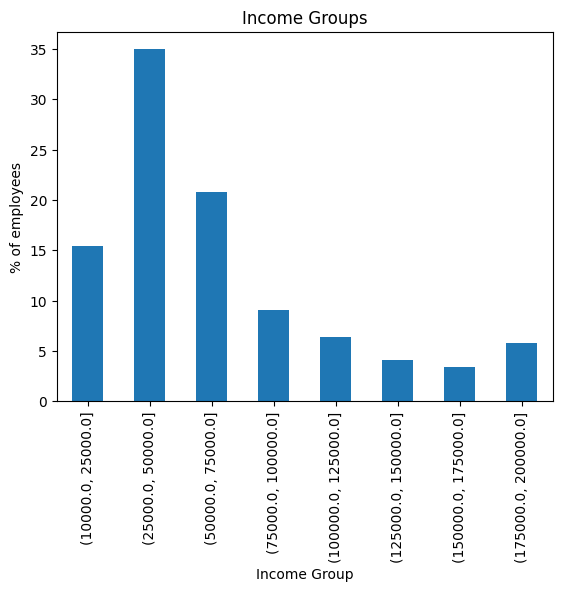

In [88]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.IncomeGroups, AttritionFalse.IncomeGroups.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Income Groups', ylabel='% of employees', xlabel='Income Group', legend=False)

### Years at Company (change to below 2 if possible)

In [89]:
#New column: Years at Company Groups
data_hr['YearsAtCompanyGroups'] = pd.cut(data_hr['YearsAtCompany'], bins=[-1, 2, 5, 10, 15, 20, 30, 40, np.inf])

<AxesSubplot: title={'center': 'Years at Company'}, xlabel='Years at Company', ylabel='% of employees'>

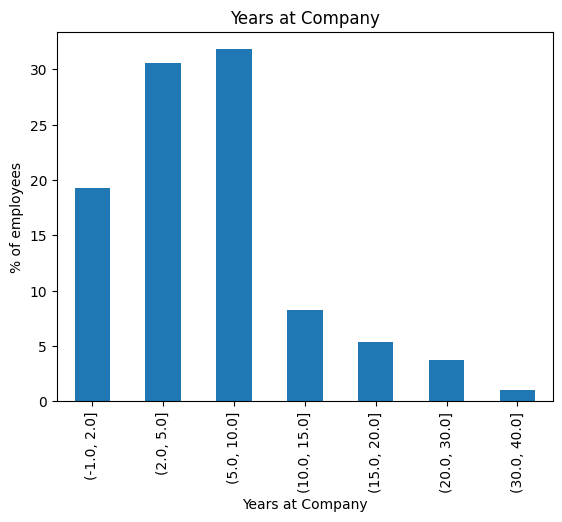

In [90]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.YearsAtCompanyGroups, AttritionFalse.YearsAtCompanyGroups.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Years at Company', ylabel='% of employees', xlabel= 'Years at Company', legend=False)

### Training

<AxesSubplot: title={'center': 'Number of Trainings last year'}, xlabel='Number of Trainings', ylabel='% of employees'>

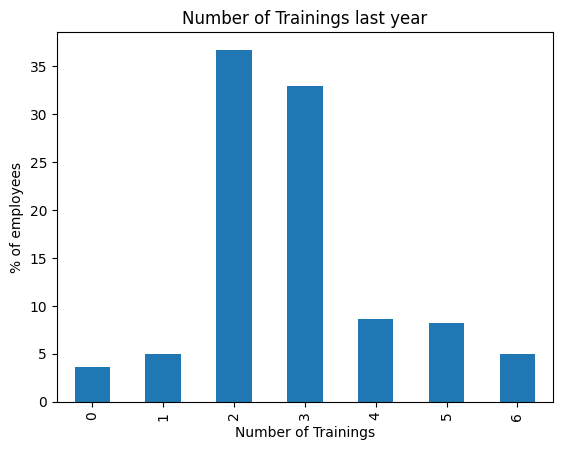

In [91]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.TrainingTimesLastYear, AttritionFalse.TrainingTimesLastYear.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Number of Trainings last year', ylabel='% of employees', xlabel='Number of Trainings', legend=False)

### Promotions 
- maybe re-create stating number of promotions last year, the year before etc.

In [92]:
#New Attrition false for employees that have been at the company for 1 year or more.
AttritionFalse2 = AttritionFalse[AttritionFalse.YearsAtCompany >=1]

<AxesSubplot: title={'center': 'Years since last promotion'}, xlabel='Number of years since last promotion within company', ylabel='% of employees'>

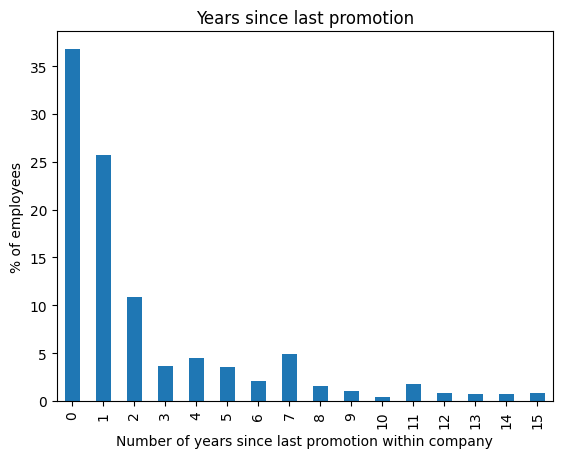

In [93]:

(pd.crosstab(AttritionFalse2.YearsSinceLastPromotion, AttritionFalse2.YearsSinceLastPromotion.count()).apply(lambda r: r/len(AttritionFalse2)*100, axis=1)).plot(kind='bar', title='Years since last promotion', ylabel='% of employees', xlabel='Number of years since last promotion within company', legend=False)

### Salary Hike

In [94]:
#Grouping salary hike 
data_hr['PercentSalaryHikeGroups'] = pd.cut(data_hr['PercentSalaryHike'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])

<AxesSubplot: title={'center': 'Percent salary hike'}, xlabel='Salary hike%', ylabel='% of employees'>

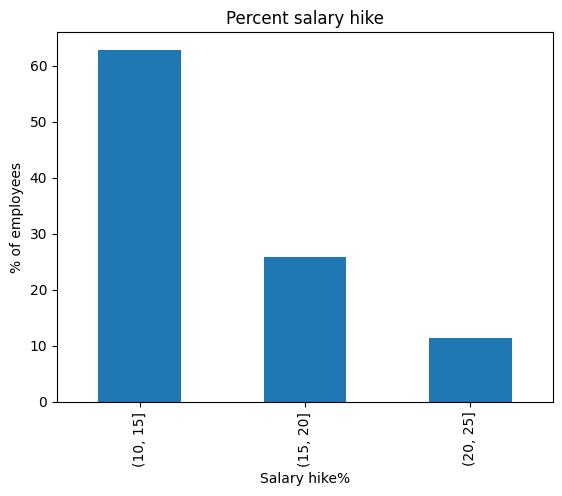

In [95]:
AttritionFalse = data_hr[data_hr.Attrition == False]

(pd.crosstab(AttritionFalse.PercentSalaryHikeGroups, AttritionFalse.PercentSalaryHikeGroups.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).plot(kind='bar', title='Percent salary hike', ylabel='% of employees', xlabel='Salary hike%', legend=False)

### Performance

<AxesSubplot: title={'center': 'Performance Rating'}, xlabel='Performance rating', ylabel='% of employees'>

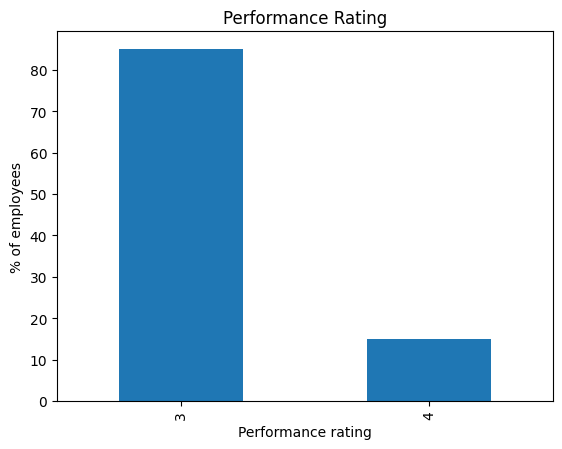

In [96]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.PerformanceRating, AttritionFalse.PerformanceRating.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).sort_values(AttritionFalse.PerformanceRating.count(), ascending=False).plot(kind='bar', title='Performance Rating', ylabel='% of employees', xlabel='Performance rating', legend=False)

In [97]:
#checking the lowest performance rating
data_hr['PerformanceRating'].nsmallest(1)

0    3
Name: PerformanceRating, dtype: int64

### Job Satisfaction

<AxesSubplot: title={'center': 'Job Satisfaction'}, xlabel='Job satisfaction', ylabel='% of employees'>

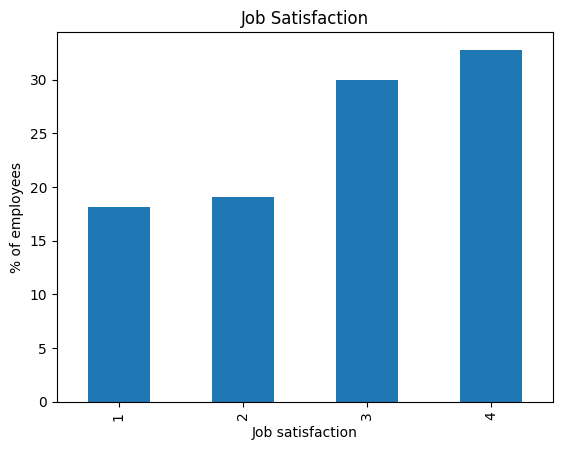

In [98]:
AttritionFalse = data_hr[data_hr.Attrition == False]
(pd.crosstab(AttritionFalse.JobSatisfaction, AttritionFalse.JobSatisfaction.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).sort_values(AttritionFalse.JobSatisfaction.count(), ascending=True).plot(kind='bar', title='Job Satisfaction', ylabel='% of employees', xlabel='Job satisfaction', legend=False)

### Title

<AxesSubplot: title={'center': 'Job Role'}, xlabel='Job role', ylabel='% of employees'>

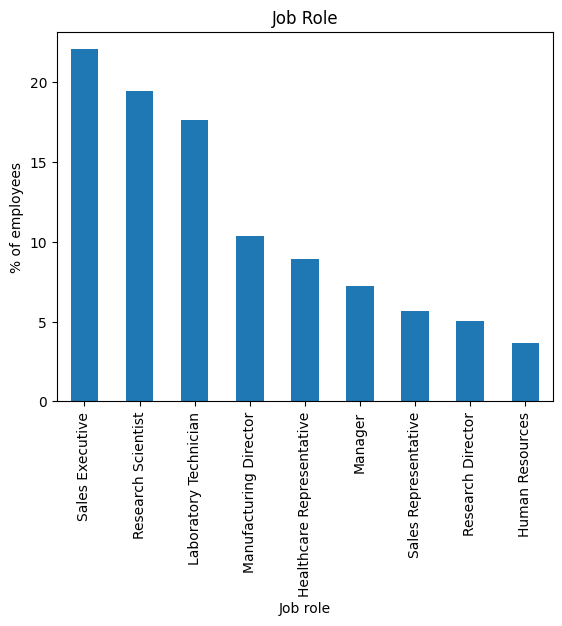

In [99]:
#Bar chart for Education Field
(pd.crosstab(AttritionFalse.JobRole, AttritionFalse.JobRole.count()).apply(lambda r: r/len(AttritionFalse)*100, axis=1)).sort_values(AttritionFalse.JobRole.count(), ascending=False).plot(kind='bar', title='Job Role', ylabel='% of employees', xlabel='Job role', legend=False)

## Correlation Matrix

<AxesSubplot: >

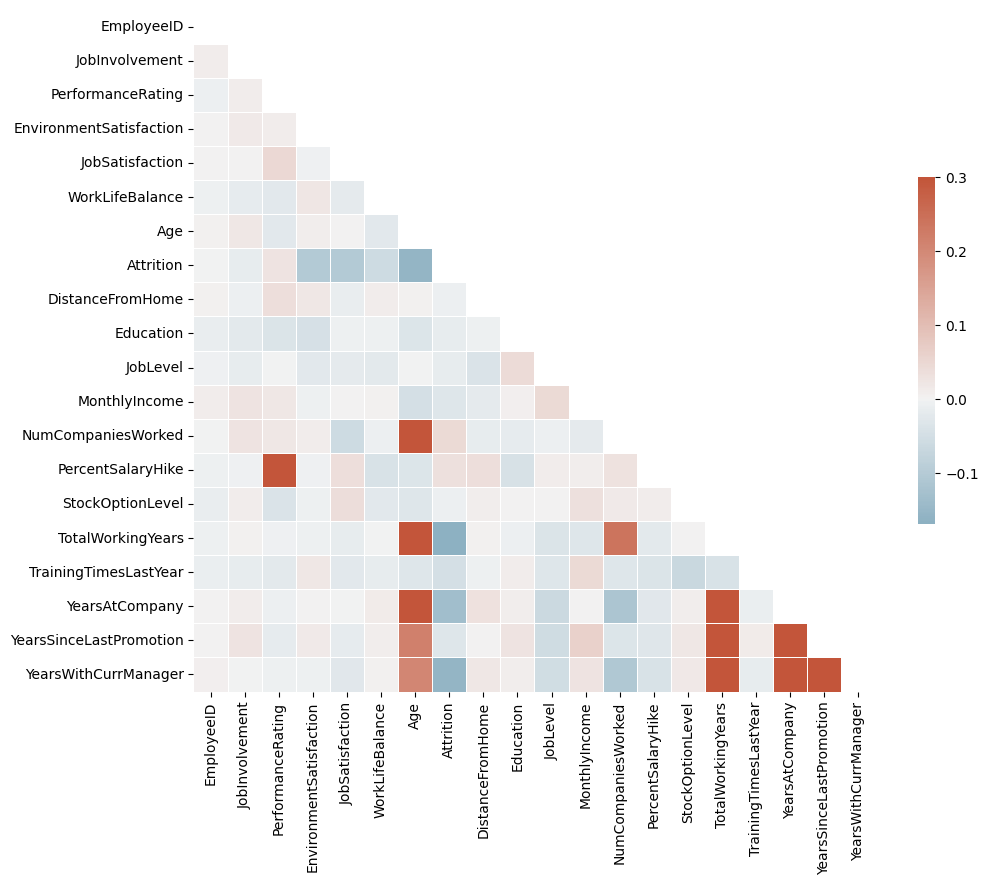

In [100]:
#quick correlation check

# Compute the correlation matrix
corr = data_hr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## UML

In [101]:
print(data_hr)

      EmployeeID  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0              1               3                  3                        3   
1              2               2                  4                        3   
2              3               3                  3                        2   
3              4               2                  3                        4   
4              5               3                  3                        4   
...          ...             ...                ...                      ...   
4404        4405               2                  3                        3   
4405        4406               3                  3                        4   
4406        4407               2                  3                        4   
4407        4408               3                  4                        1   
4408        4409               2                  3                        4   

      JobSatisfaction  WorkLifeBalance 

In [102]:
#Making a dataframe with no text for UML model
data_to_cluster = data_hr[['Attrition', 'JobSatisfaction', 'EmployeeID', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [103]:
data_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4300 non-null   bool   
 1   JobSatisfaction          4300 non-null   int64  
 2   EmployeeID               4300 non-null   int64  
 3   StockOptionLevel         4300 non-null   int64  
 4   TotalWorkingYears        4300 non-null   float64
 5   TrainingTimesLastYear    4300 non-null   int64  
 6   YearsAtCompany           4300 non-null   int64  
 7   JobInvolvement           4300 non-null   int64  
 8   PerformanceRating        4300 non-null   int64  
 9   EnvironmentSatisfaction  4300 non-null   int64  
 10  WorkLifeBalance          4300 non-null   int64  
 11  Age                      4300 non-null   int64  
 12  DistanceFromHome         4300 non-null   int64  
 13  Education                4300 non-null   int64  
 14  JobLevel                

In [104]:
#Importing UML packages
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [105]:
# learn x-y relationships (principal components) and transform
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [107]:
data_to_cluster_minmax = scaler_min_max.fit_transform(data_to_cluster)

In [108]:
data_to_cluster

,Attrition,JobSatisfaction,EmployeeID,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsSinceLastPromotion,YearsWithCurrManager
0,False,4,1,0,1.0,6,1,3,3,3,2,51,6,2,1,131160,1,11,0,0
1,True,2,2,1,6.0,3,5,2,4,3,4,31,10,1,1,41890,0,23,1,4
2,False,2,3,3,5.0,2,5,3,3,2,1,32,17,4,4,193280,1,15,0,3
3,False,4,4,3,13.0,5,8,2,3,4,3,38,2,5,3,83210,3,11,7,5
4,False,1,5,2,9.0,2,6,3,3,4,3,32,10,1,1,23420,4,12,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,False,4,4405,0,6.0,2,6,2,3,3,3,29,4,3,2,35390,1,18,1,5
4405,False,1,4406,1,10.0,5,3,3,3,4,3,42,5,4,1,60290,3,17,0,2
4406,False,4,4407,0,10.0,2,3,2,3,4,3,29,2,4,1,26790,2,15,0,2
4407,False,3,4408,0,5.0,4,4,3,4,1,3,25,25,2,2,37020,0,20,1,2


### PCA

In [109]:
# load up and instantiate PCS
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [110]:
# fit-transform the data
data_reduced_pca = pca.fit_transform(data_to_cluster_scaled)

In [111]:
print(pca.components_)

[[-0.14102119 -0.00771896  0.00206654  0.00589098  0.47800361 -0.01487245
   0.50678795  0.01435149 -0.03091636  0.01100478  0.00723541  0.34702719
   0.01477624  0.00180913 -0.04790267  0.00396565  0.04582923 -0.04587204
   0.40488285  0.44949082]
 [ 0.03416826  0.05888371 -0.01231564 -0.00561818  0.04829319 -0.05411334
   0.0243549   0.01398948  0.69793583  0.01342113 -0.04866826  0.02718681
   0.04802968 -0.07152281 -0.00317806  0.0068615   0.06342777  0.69783512
   0.01179591  0.01071196]]


In [112]:
pca.components_.shape

(2, 20)

In [113]:
print(pca.explained_variance_ratio_)

[0.15133041 0.08952518]


In [114]:
#sns.scatterplot(data_reduced_pca[:,0],data_reduced_pca[:,2])

In [115]:
vis_data = pd.DataFrame(data_reduced_pca)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [116]:
# alt.Chart(vis_data).mark_circle(size=60).encode(
#     x='x',
#     y='y',
#     tooltip=['EmployeeID', 'Department']
# ).interactive()

<AxesSubplot: >

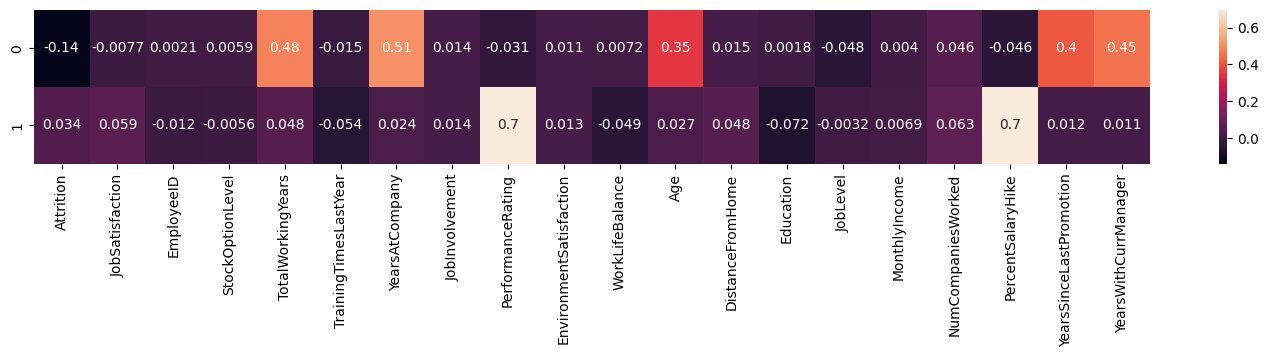

In [117]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_to_cluster.columns), annot=True)

### NMF

In [118]:
# import nmf
from sklearn.decomposition import NMF

In [119]:
# instantiate with 4 components
nmf = NMF(n_components=4)

In [120]:
# notice, we are using the min-max scaled data
data_reduced_nmf = nmf.fit_transform(data_to_cluster_minmax)

c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [121]:
data_reduced_nmf.shape

(4300, 4)

In [122]:
nmf.components_.shape

(4, 20)

<AxesSubplot: >

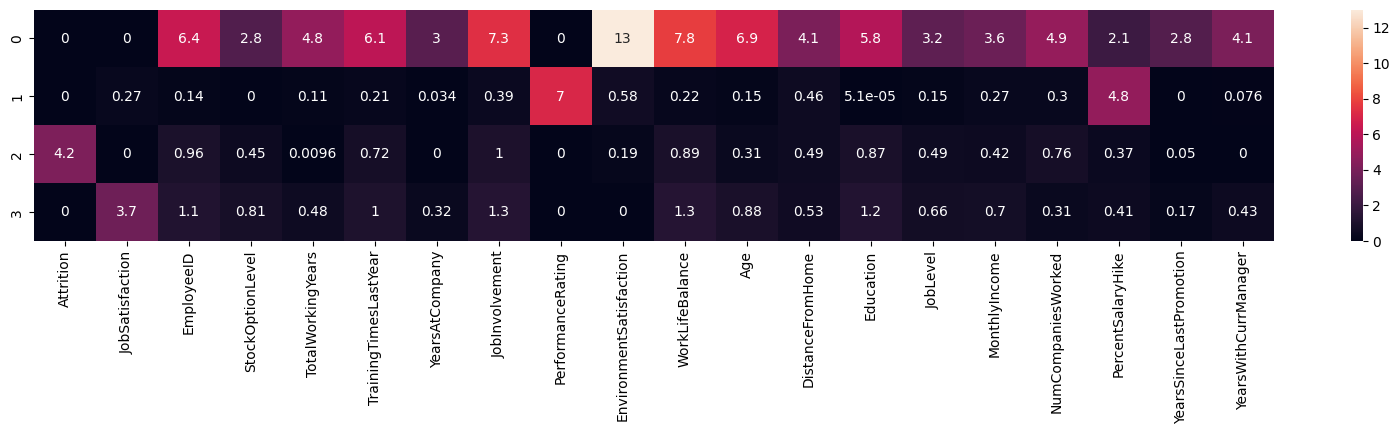

In [123]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.DataFrame(nmf.components_, columns=data_to_cluster.columns), annot=True)

### Modern Algorithms

In [124]:
import umap

In [125]:
# we totally could specify more than 2 dimensions (as well as some other parameters)
umap_scaler = umap.UMAP()

In [126]:
# umap accepts standard-scaled data
embeddings = umap_scaler.fit_transform(data_to_cluster_scaled)

In [127]:
#sns.scatterplot(embeddings[:,0],embeddings[:,1])

In [128]:
vis_data = pd.DataFrame(embeddings)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [129]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['EmployeeID', 'Department']
).interactive()

alt.Chart(...)

In [130]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)

In [131]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_to_cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)

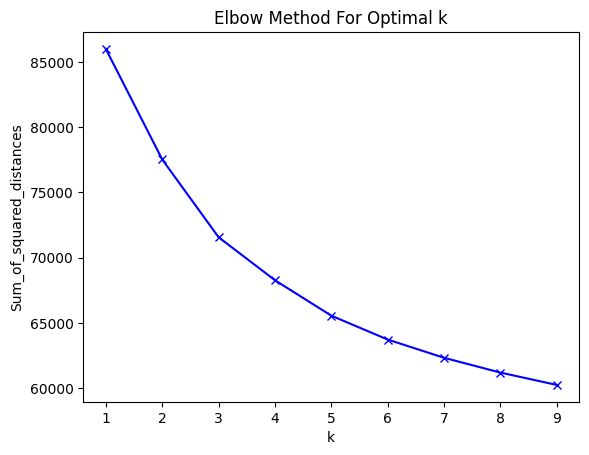

In [132]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

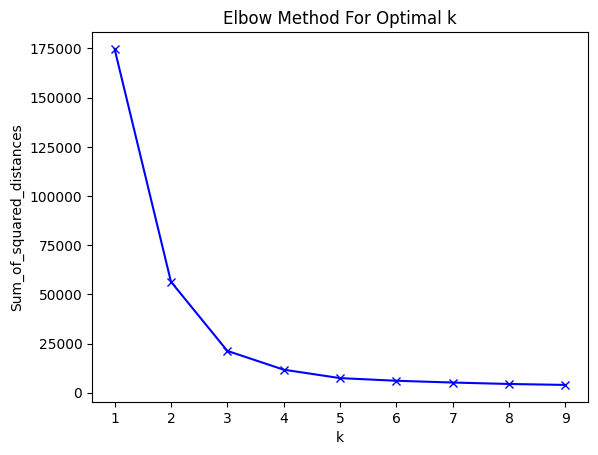

In [133]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(data_to_cluster_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [134]:
vis_data = pd.DataFrame(embeddings)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['cluster'] = 'labels'
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'cluster','Department']
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           4300 non-null   float32
 1   y           4300 non-null   float32
 2   EmployeeID  4195 non-null   float64
 3   cluster     4300 non-null   object 
 4   Department  4195 non-null   object 
dtypes: float32(2), float64(1), object(2)
memory usage: 134.5+ KB


[1 2 1 ... 1 2 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           4300 non-null   float32
 1   y           4300 non-null   float32
 2   EmployeeID  4195 non-null   float64
 3   Department  4195 non-null   object 
 4   label       4300 non-null   int32  
dtypes: float32(2), float64(1), int32(1), object(1)
memory usage: 117.7+ KB


,x,y,EmployeeID,Department,label
0,11.697809,12.524588,1.0,Sales,1
1,-3.840430,9.633574,2.0,Research & Development,2
2,12.897864,13.206229,3.0,Research & Development,1
3,13.310421,13.210098,4.0,Research & Development,1
4,14.679524,10.441622,5.0,Research & Development,1


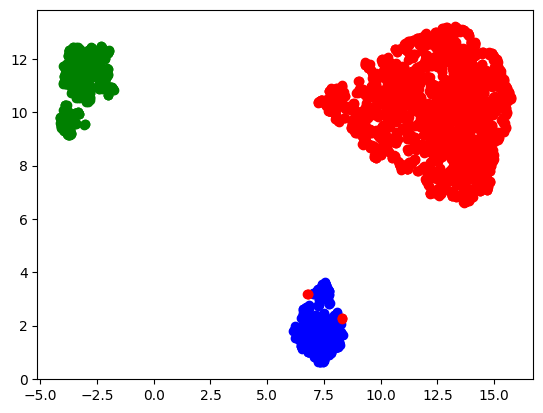

In [135]:
print(label)
df_t = pd.DataFrame(data=embeddings, columns=['x', 'y'])
df_t['EmployeeID'] = data_hr['EmployeeID']
df_t['Department'] = data_hr['Department']
df_t.columns = ['x', 'y', 'EmployeeID', 'Department']
df_t['label'] = label
only_0 = df_t[df_t['label'] == 0]
only_1 = df_t[df_t['label'] == 1]
only_2 = df_t[df_t['label'] == 2]

plt.scatter(only_0['x'], only_0['y'], color='blue')
plt.scatter(only_1['x'], only_1['y'], color='red')
plt.scatter(only_2['x'],only_2['y'], color ='green')
df_t.info()
df_t.head()

In [136]:
df_t

,x,y,EmployeeID,Department,label
0,11.697809,12.524588,1.0,Sales,1
1,-3.840430,9.633574,2.0,Research & Development,2
2,12.897864,13.206229,3.0,Research & Development,1
3,13.310421,13.210098,4.0,Research & Development,1
4,14.679524,10.441622,5.0,Research & Development,1
...,...,...,...,...,...
4295,12.385505,11.013390,4296.0,Sales,1
4296,15.190563,11.019594,4297.0,Sales,1
4297,13.002025,11.058587,4298.0,Research & Development,1
4298,-3.864249,11.706546,4299.0,Sales,2


### EDA for the clusters 

In [137]:
vis_cluster = pd.merge(data_hr, df_t, on='EmployeeID')

In [138]:
#Get an idea of how many entries there is in every cluster 
vis_cluster.head()
vis_cluster['label'].value_counts().nlargest()

1    3042
2     640
0     513
Name: label, dtype: int64

#### A tabel with the mean of all the clusters, together. To see if there are any major differences, with regards to clustering them 

In [139]:
vis_cluster.groupby('label').mean()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,x,y
label,,,,,,,,,,,,,,,,,,,,,
0,2145.543860,2.769981,3.171540,2.740741,2.725146,2.703704,36.594542,0.148148,8.910331,2.974659,...,2.615984,15.409357,0.750487,11.200780,2.820663,6.902534,2.329435,4.042885,7.264765,1.837335
1,2168.280736,2.715648,3.144642,2.701183,2.733070,2.774490,37.016437,0.160421,9.213018,2.909928,...,2.714661,15.122288,0.800131,11.295858,2.795529,6.945102,2.119987,4.071663,12.294929,10.056820
2,2119.376563,2.753125,3.185938,2.789062,2.679688,2.754688,36.615625,0.181250,9.318750,2.892187,...,2.601562,15.453125,0.807813,11.290625,2.798437,7.437500,2.406250,4.443750,-3.156502,11.206198


#### Splitting the data up into the three different clusters

In [140]:
label_0 = vis_cluster[vis_cluster['label'] <= 0]
label_1 = vis_cluster[vis_cluster['label'] <= 1]
label_2 = vis_cluster[vis_cluster['label'] <= 2]


#### Crosstab with overview over the different departments in every cluster 

In [141]:
Dep_0 = pd.crosstab(label_0['label'], label_0['Department_x'])
Dep_1 = pd.crosstab(label_1['label'], label_1['Department_x'])
Dep_2 = pd.crosstab(label_2['label'], label_2['Department_x'])
Travel_0 = pd.crosstab(label_0['label'], label_0['BusinessTravel'])
Travel_1 = pd.crosstab(label_1['label'], label_1['BusinessTravel'])
Travel_2 = pd.crosstab(label_2['label'], label_2['BusinessTravel'])

In [142]:
print(Dep_2)

Department_x  Human Resources  Research & Development  Sales
label                                                       
0                          18                     332    163
1                         139                    1994    909
2                          24                     417    199


In [143]:
print(Travel_2)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
label                                                       
0                       64                 97            352
1                      305                572           2165
2                       58                120            462


In [144]:
vis_cluster.head(500)

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department_x,...,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroups,IncomeGroups,YearsAtCompanyGroups,PercentSalaryHikeGroups,x,y,Department_y,label
0,1,3,3,3,4,2,51,False,Travel_Rarely,Sales,...,0,0,"(50.0, 60.0]","(125000.0, 150000.0]","(-1.0, 2.0]","(10, 15]",11.697809,12.524588,Sales,1
1,2,2,4,3,2,4,31,True,Travel_Frequently,Research & Development,...,1,4,"(30.0, 40.0]","(25000.0, 50000.0]","(2.0, 5.0]","(20, 25]",-3.840430,9.633574,Research & Development,2
2,3,3,3,2,2,1,32,False,Travel_Frequently,Research & Development,...,0,3,"(30.0, 40.0]","(175000.0, 200000.0]","(2.0, 5.0]","(10, 15]",12.897864,13.206229,Research & Development,1
3,4,2,3,4,4,3,38,False,Non-Travel,Research & Development,...,7,5,"(30.0, 40.0]","(75000.0, 100000.0]","(5.0, 10.0]","(10, 15]",13.310421,13.210098,Research & Development,1
4,5,3,3,4,1,3,32,False,Travel_Rarely,Research & Development,...,0,4,"(30.0, 40.0]","(10000.0, 25000.0]","(5.0, 10.0]","(10, 15]",14.679524,10.441622,Research & Development,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,515,3,3,1,3,3,56,False,Travel_Frequently,Research & Development,...,0,3,"(50.0, 60.0]","(50000.0, 75000.0]","(2.0, 5.0]","(10, 15]",-3.880346,10.012480,Research & Development,2
496,516,3,3,4,4,2,36,False,Travel_Rarely,Research & Development,...,7,8,"(30.0, 40.0]","(25000.0, 50000.0]","(10.0, 15.0]","(15, 20]",7.243443,3.356370,Research & Development,0
497,517,2,3,3,1,4,55,False,Non-Travel,Research & Development,...,6,2,"(50.0, 60.0]","(75000.0, 100000.0]","(5.0, 10.0]","(15, 20]",15.104365,9.057662,Research & Development,1
498,518,2,4,3,4,3,43,False,Travel_Rarely,Sales,...,0,0,"(40.0, 50.0]","(50000.0, 75000.0]","(-1.0, 2.0]","(20, 25]",12.437496,10.154873,Sales,1


#### Tabels that describes every cluster

In [145]:
label_0.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department_x,...,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroups,IncomeGroups,YearsAtCompanyGroups,PercentSalaryHikeGroups,x,y,Department_y,label
11,13,3,3,4,1,3,55,False,Travel_Rarely,Research & Development,...,4,13,"(50.0, 60.0]","(50000.0, 75000.0]","(30.0, 40.0]","(15, 20]",7.420552,3.299782,Research & Development,0
24,27,3,4,1,1,3,26,False,Travel_Frequently,Research & Development,...,3,3,"(25.0, 30.0]","(150000.0, 175000.0]","(2.0, 5.0]","(20, 25]",7.327268,1.786282,Research & Development,0
26,29,2,3,4,3,1,44,True,Travel_Frequently,Research & Development,...,0,0,"(40.0, 50.0]","(100000.0, 125000.0]","(-1.0, 2.0]","(10, 15]",7.099452,1.579823,Research & Development,0
31,34,3,3,3,2,3,36,False,Travel_Rarely,Sales,...,7,7,"(30.0, 40.0]","(50000.0, 75000.0]","(5.0, 10.0]","(10, 15]",6.652442,2.611510,Sales,0
34,37,3,3,2,4,2,37,False,Travel_Frequently,Sales,...,1,2,"(30.0, 40.0]","(10000.0, 25000.0]","(2.0, 5.0]","(10, 15]",6.387467,1.629177,Sales,0


In [146]:
label_0.describe()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,JobLevel,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,x,y,label
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,...,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.0
mean,2145.543860,2.769981,3.171540,2.740741,2.725146,2.703704,36.594542,8.910331,2.974659,2.105263,...,15.409357,0.750487,11.200780,2.820663,6.902534,2.329435,4.042885,7.264764,1.837335,0.0
std,1238.297027,0.659749,0.377348,1.075761,1.104187,0.738139,9.117255,8.354204,1.019986,1.098930,...,3.712846,0.824506,7.742476,1.275904,5.939659,3.311711,3.435527,0.530018,0.700740,0.0
min,13.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.140645,0.613162,0.0
25%,1024.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.000000,...,13.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,6.848635,1.338472,0.0
50%,2133.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,6.000000,3.000000,2.000000,...,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,7.267673,1.721608,0.0
75%,3259.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,3.000000,...,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,7.692976,2.245172,0.0
max,4294.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,5.000000,...,25.000000,3.000000,37.000000,6.000000,36.000000,15.000000,17.000000,8.358628,3.615100,0.0


In [147]:
label_1.describe()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,JobLevel,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,x,y,label
count,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,...,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000
mean,2164.999719,2.723488,3.148523,2.706892,2.731927,2.764276,36.955556,9.169339,2.919269,2.064135,...,15.163713,0.792968,11.282138,2.799156,6.938959,2.150211,4.067511,11.569056,8.870717,0.855696
std,1238.948578,0.708734,0.355668,1.100798,1.101430,0.702608,9.165872,8.147557,1.028003,1.103708,...,3.620532,0.850308,7.810358,1.292221,6.097541,3.181606,3.523528,2.582371,3.231782,0.351447
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.140645,0.613162,0.000000
25%,1084.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.000000,...,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,9.614514,8.128973,1.000000
50%,2172.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,2.000000,...,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,12.261121,9.895958,1.000000
75%,3244.500000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,3.000000,...,18.000000,1.000000,15.000000,3.000000,9.000000,2.000000,7.000000,13.705747,10.951121,1.000000
max,4300.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,5.000000,...,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,15.732389,13.220218,1.000000


In [148]:
label_2.describe()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,JobLevel,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,x,y,label
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,...,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,2158.039333,2.728010,3.154231,2.719428,2.723957,2.762813,36.903695,9.192133,2.915137,2.067461,...,15.207867,0.795232,11.283433,2.799046,7.015018,2.189273,4.124911,9.322488,9.227024,1.030274
std,1241.308214,0.709742,0.361213,1.097181,1.101690,0.706432,9.139739,8.091205,1.024705,1.106394,...,3.658814,0.851813,7.803958,1.290957,6.133432,3.227642,3.563263,5.809516,3.110515,0.523450
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.134802,0.613162,0.000000
25%,1082.500000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.000000,...,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,7.621172,8.518060,1.000000
50%,2162.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,2.000000,...,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,11.425848,10.129109,1.000000
75%,3233.500000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,3.000000,...,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,13.444728,11.271234,1.000000
max,4300.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,5.000000,...,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,15.732389,13.220218,2.000000


In [149]:
label_0['label'].value_counts()
label_1['label'].value_counts()
label_2['label'].value_counts()


1    3042
2     640
0     513
Name: label, dtype: int64

#### Piecharts for the three clusters, with regards to attrition

<AxesSubplot: title={'center': 'Hidden Groups'}>

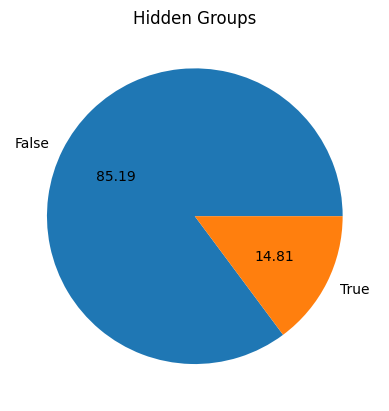

In [150]:
label_0.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', title='Hidden Groups')

<AxesSubplot: title={'center': 'Hidden Groups'}>

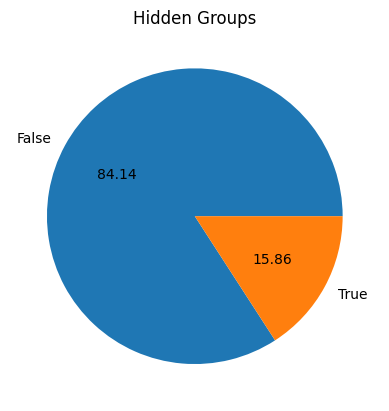

In [151]:
label_1.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', title='Hidden Groups')


<AxesSubplot: title={'center': 'Hidden Groups'}>

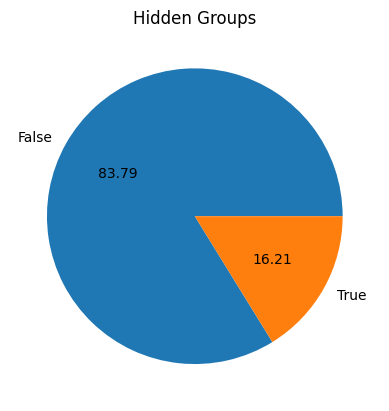

In [152]:
label_2.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', title='Hidden Groups')

#### Performance metrics for clustering

# SML
### Feature engineering


In [153]:
data_hr

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroups,IncomeGroups,YearsAtCompanyGroups,PercentSalaryHikeGroups
0,1,3,3,3,4,2,51,False,Travel_Rarely,Sales,...,0,1.0,6,1,0,0,"(50.0, 60.0]","(125000.0, 150000.0]","(-1.0, 2.0]","(10, 15]"
1,2,2,4,3,2,4,31,True,Travel_Frequently,Research & Development,...,1,6.0,3,5,1,4,"(30.0, 40.0]","(25000.0, 50000.0]","(2.0, 5.0]","(20, 25]"
2,3,3,3,2,2,1,32,False,Travel_Frequently,Research & Development,...,3,5.0,2,5,0,3,"(30.0, 40.0]","(175000.0, 200000.0]","(2.0, 5.0]","(10, 15]"
3,4,2,3,4,4,3,38,False,Non-Travel,Research & Development,...,3,13.0,5,8,7,5,"(30.0, 40.0]","(75000.0, 100000.0]","(5.0, 10.0]","(10, 15]"
4,5,3,3,4,1,3,32,False,Travel_Rarely,Research & Development,...,2,9.0,2,6,0,4,"(30.0, 40.0]","(10000.0, 25000.0]","(5.0, 10.0]","(10, 15]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3,4,3,29,False,Travel_Rarely,Sales,...,0,6.0,2,6,1,5,"(25.0, 30.0]","(25000.0, 50000.0]","(5.0, 10.0]","(15, 20]"
4405,4406,3,3,4,1,3,42,False,Travel_Rarely,Research & Development,...,1,10.0,5,3,0,2,"(40.0, 50.0]","(50000.0, 75000.0]","(2.0, 5.0]","(15, 20]"
4406,4407,2,3,4,4,3,29,False,Travel_Rarely,Research & Development,...,0,10.0,2,3,0,2,"(25.0, 30.0]","(25000.0, 50000.0]","(2.0, 5.0]","(10, 15]"
4407,4408,3,4,1,3,3,25,False,Travel_Rarely,Research & Development,...,0,5.0,4,4,1,2,"(17.999, 25.0]","(25000.0, 50000.0]","(2.0, 5.0]","(15, 20]"


#### Streamlit UI ?

In [154]:
data_hr[data_hr['EmployeeID'] == 1]

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroups,IncomeGroups,YearsAtCompanyGroups,PercentSalaryHikeGroups
0,1,3,3,3,4,2,51,False,Travel_Rarely,Sales,...,0,1.0,6,1,0,0,"(50.0, 60.0]","(125000.0, 150000.0]","(-1.0, 2.0]","(10, 15]"


#### Preprocessing

In [155]:
selected_sml_df = data_hr[['Age',
                           'TotalWorkingYears',
                           'YearsAtCompany',
                           'YearsWithCurrManager',
                           'EnvironmentSatisfaction',
                           'JobSatisfaction',
                           'Attrition']]

In [156]:
X = selected_sml_df.iloc[:,:-1]

y = selected_sml_df.Attrition

In [157]:
selected_sml_df

,Age,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,Attrition
0,51,1.0,1,0,3,4,False
1,31,6.0,5,4,3,2,True
2,32,5.0,5,3,2,2,False
3,38,13.0,8,5,4,4,False
4,32,9.0,6,4,4,1,False
...,...,...,...,...,...,...,...
4404,29,6.0,6,5,3,4,False
4405,42,10.0,3,2,4,1,False
4406,29,10.0,3,2,4,4,False
4407,25,5.0,4,2,1,3,False


In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [159]:
transformed_nummerical = scaler.fit_transform(X.iloc[:,:])

X.iloc[:,:] = transformed_nummerical

In [160]:
X

,Age,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction
0,1.538800,-1.320442,-0.980272,-1.159067,0.252403,1.157359
1,-0.648079,-0.678523,-0.329582,-0.037179,0.252403,-0.657940
2,-0.538735,-0.806907,-0.329582,-0.317651,-0.661946,-0.657940
3,0.117329,0.220163,0.158435,0.243293,1.166752,1.157359
4,-0.538735,-0.293372,-0.166910,-0.037179,1.166752,-1.565590
...,...,...,...,...,...,...
4404,-0.866767,-0.678523,-0.166910,0.243293,0.252403,1.157359
4405,0.554704,-0.164988,-0.654927,-0.598123,1.166752,-1.565590
4406,-0.866767,-0.164988,-0.654927,-0.598123,1.166752,1.157359
4407,-1.304143,-0.806907,-0.492255,-0.598123,-1.576295,0.249709


In [161]:
X.index = range(len(X))

In [162]:
X.index

RangeIndex(start=0, stop=4300, step=1)

### Spliting and preparing for ML

In [163]:
import shap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Fixing the unbalance in the dataset 

In [165]:
print("Before undersampling: ", Counter(y_train))

undersample = RandomUnderSampler(sampling_strategy='majority')

Before undersampling:  Counter({False: 2890, True: 550})


In [166]:
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print("After undersampling: ", Counter(y_train_under))


After undersampling:  Counter({False: 550, True: 550})


In [169]:
model_xgb = XGBClassifier()

model_xgb.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [170]:
print('Model XGB' + ' ' + str(model_xgb.score(X_train, y_train)))

Model XGB 0.8642441860465117


In [171]:
data_hr['Attrition'].value_counts()

False    3605
True      695
Name: Attrition, dtype: int64

In [172]:
y_pred_train = model_xgb.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

0.3684505583568688

In [173]:
len(y_pred_train)

3440

In [174]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 1])

In [175]:
y_pred_train = model_xgb.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

0.3684505583568688

<AxesSubplot: >

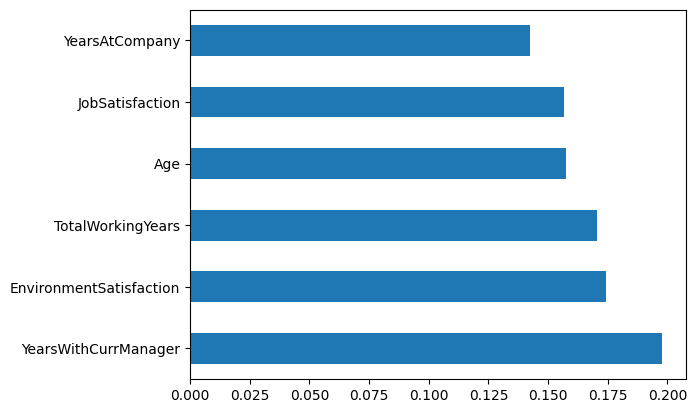

In [176]:
feat_importances = pd.Series(model_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [177]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


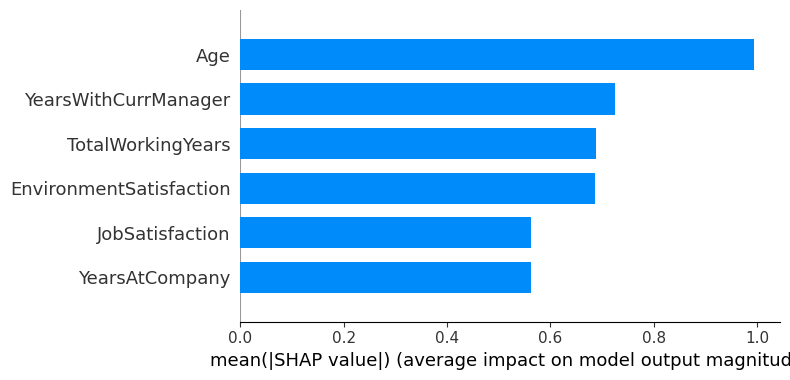

In [178]:
shap.summary_plot(shap_values, X, plot_type="bar")

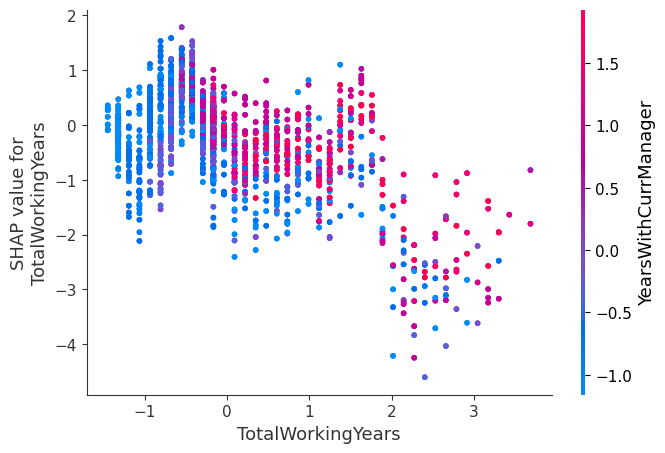

In [179]:
shap.dependence_plot("TotalWorkingYears", shap_values, X)

In [180]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

## Inference 

In [181]:
import pickle
import itertools

In [182]:
model_xgb.save_model('model_xgb.json')

In [183]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [184]:
pickle.dump(selected_sml_df, open('selected_sml_df.pkl','wb'))

In [185]:
X.to_json('X.json')

In [186]:
data_hr.to_json('selected_sml_df.json')

In [187]:
pickle.dump(model_xgb, open('model_xgb.pkl','wb'))

In [188]:
pickle.dump(shap_values, open('shap_values.pkl','wb'))

In [189]:
model_xgb = pickle.load(open('model_xgb.pkl','rb'))

In [190]:
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [191]:
scaler = pickle.load(open('scaler.pkl','rb'))

In [192]:
X = pd.read_json('X.json')

In [193]:
data_hr = pd.read_json('selected_sml_df.json')

In [194]:
shap_values = pickle.load(open('shap_values.pkl','rb'))
explainer = shap.TreeExplainer(model_xgb)

In [195]:
data_hr.iloc[0].values

array([1, 3, 3, 3, 4, 2, 51, False, 'Travel_Rarely', 'Sales', 6, 2,
       'Life Sciences', 'Female', 1, 'Healthcare Representative',
       'Married', 131160, 1, 11, 0, 1, 6, 1, 0, 0,
       {'closed': 'right', 'closed_left': False, 'closed_right': True, 'is_empty': False, 'left': 50.0, 'length': 10.0, 'mid': 55.0, 'open_left': True, 'open_right': False, 'right': 60.0},
       {'closed': 'right', 'closed_left': False, 'closed_right': True, 'is_empty': False, 'left': 125000.0, 'length': 25000.0, 'mid': 137500.0, 'open_left': True, 'open_right': False, 'right': 150000.0},
       {'closed': 'right', 'closed_left': False, 'closed_right': True, 'is_empty': False, 'left': -1.0, 'length': 3.0, 'mid': 0.5, 'open_left': True, 'open_right': False, 'right': 2.0},
       {'closed': 'right', 'closed_left': False, 'closed_right': True, 'is_empty': False, 'left': 10, 'length': 5, 'mid': 12.5, 'open_left': True, 'open_right': False, 'right': 15}],
      dtype=object)

In [196]:
ohe = pickle.load(open('selected_sml_df.pkl','rb'))

In [197]:
# The original code below
# cats = list(itertools.chain(*ohe.categories_))
cats = list(itertools.chain(*ohe))

In [198]:
# new_df = pd.DataFrame({Age':'TotalWorkingYears','YearsAtCompany','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction',
#                            'Attrition']]}, index=[0])

In [199]:
# model_xgb.predict(ohe)

ValueError: Feature shape mismatch, expected: 6, got 7

In [ ]:
# new_values_cat = pd.DataFrame(ohe.transform(new_df), columns = cats , index=[0])